# 598RL HW2

In [1]:
#import basic packages
from IPython.display import clear_output
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Common functions:

In [2]:
def get_action(Q_table, curr_state, exp_prob, action_str, gridmap):
    
    n_act = len(action_str)
    rand_n = np.random.rand(1)[0]
    if rand_n < exp_prob:
        action = action_str[np.random.randint(n_act)]
        
    else:
        state_row = get_state_row(curr_state, gridmap)
        action_col = np.argmax(Q_table[state_row,:])
        action = action_str[action_col]
        
    return action

In [3]:
def get_state_row(curr_state, gridmap):
    
    state_row = curr_state[0]*len(gridmap[0]) + curr_state[1]
    return state_row

In [4]:
def remap_Q(Q):
    
    tmp = np.empty(Q.shape)
    for i in range(0, Q.shape[0]):
        minq, maxq = min(Q[i,:]), max(Q[i,:])
        tmp[i,:] = (Q[i,:] - minq) / (maxq - minq)
    return tmp

## SARSA with epsilon-greedy policy (S&B 6.4):

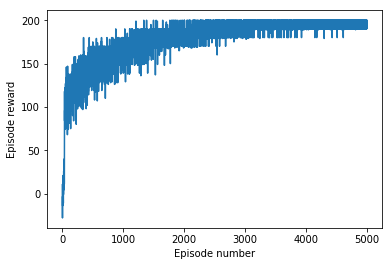

[[ 28.55320422 194.23652204  14.74767878  20.48618003]
 [200.56172456 200.48178246 200.32579481 202.69734336]
 [ 30.19076685  43.90247185  12.55716073 198.96395408]
 [ 16.72849811  17.38064363  21.51072062 195.93546364]
 [ 14.56758262  20.93357447   1.79641572 189.99183182]
 [ 79.6878595   89.98382376 198.20172204  79.77539892]
 [200.65672175 194.04211351 193.88361046 193.80765061]
 [103.0830148  125.01815309  88.61622567 198.39804767]
 [ 80.76240849  68.57558538  60.12337475 196.20749985]
 [ 24.11512505  19.95842185  36.89615789 193.51313844]
 [131.85863983 111.0103361  196.12733801 114.97737952]
 [198.63626279 190.51321116 190.08223728 190.37501508]
 [ 94.61978724  90.00497279  69.17715657 195.78864177]
 [193.74986732  23.33140972  13.41427058  56.1696618 ]
 [185.86420578   2.09240558   6.97046556  13.35840831]
 [193.37515337  71.26722944  96.231147    88.86587961]
 [196.63622006 189.34524729 190.44333064 188.78332825]
 [104.54253335  94.52533107  74.43962504 194.34757852]
 [ 36.0689

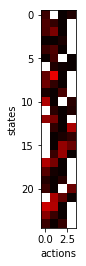

In [5]:
##change set level to easy or hard

import gym
import gridworld

env = gym.make('GridWorld-v0')
set_level = 'easy'
show_heatmap = True
n_eps, episode_length = 5000, 100
epsilon = 0.4
epsilon_decay = 0.999
lr = 0.05
gamma = 0.99

n_action = len(env.action_str)
n_states = len(env.GRIDMAP[0]) * len(env.GRIDMAP)
Q_ = np.random.rand(n_states,n_action)
#Q_ = Q_ / Q_.sum(axis=1, keepdims=True)
reward_array = np.zeros([n_eps,])

for i_eps in range(0, n_eps):
    
    eps_reward = 0
    epsilon = epsilon*epsilon_decay
    s = env.reset(set_level)
    a = get_action(Q_, s, epsilon, env.action_str, env.GRIDMAP)
    
    for i_step in range(0, episode_length):

        srow = get_state_row(s, env.GRIDMAP)
        acol = env.action_str.find(a)

        s_, reward, done, info = env.step(a)
        a_ = get_action(Q_, s_, epsilon, env.action_str, env.GRIDMAP)
        s_row = get_state_row(s_, env.GRIDMAP)
        a_col = env.action_str.find(a_)
        Q_[srow,acol] = Q_[srow,acol] + lr*( reward + gamma*Q_[s_row,a_col] - Q_[srow,acol] )
        
        eps_reward += reward
        s, a = s_, a_

    reward_array[i_eps] = eps_reward
        
plt.plot(reward_array)
plt.xlabel('Episode number')
plt.ylabel('Episode reward')
plt.show()
        
print(Q_)
plt.imshow(remap_Q(Q_), cmap='hot', interpolation='nearest')
plt.xlabel('actions')
plt.ylabel('states')
plt.show()

In [6]:
#visualize trajectory:
episode_length = 20
reward_total = 0
sleep_time = 0.5
s = env.reset(set_level)
clear_output(wait=True)
env.render()
time.sleep(sleep_time)

for i_step in range(0, episode_length):
    
    a = get_action(Q_, s, 0.0, env.action_str, env.GRIDMAP)
    s, reward, done, info = env.step(a)
    reward_total += reward
    clear_output(wait=True)
    env.render()
    print('\nStep:',i_step, 'Reward:', reward_total)
    time.sleep(sleep_time)

-A-B-
-----
---b-
-X---
-a---

 19 40


## Q-Learning (S&B 6.5):

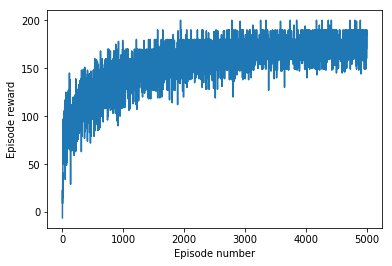

[[ 69.23340607  75.05748161 179.1157458   92.06103493]
 [180.3321412  180.33251335 180.64928655 180.33231466]
 [ 67.10935508  74.16257384  56.82500128 179.13661533]
 [120.81406312 127.13338934 176.25187353 126.86130998]
 [ 32.91699221   8.03373253  15.54207562 173.89470908]
 [172.74389691 170.07191355 176.43441163 171.0623613 ]
 [178.60729755 174.7431236  174.38204016 174.79707895]
 [169.12347729 170.63871113 163.68227555 176.42326729]
 [174.34632555 106.53224385  83.14384133 117.48190446]
 [ 21.91393635  44.53177462  20.92901987 172.02125773]
 [172.49088435 169.25557108 174.4837078  170.73977775]
 [176.62454596 172.93949721 172.93381665 172.85436611]
 [170.03977808 169.28998396 169.31362767 174.48987638]
 [157.44613118 160.79358182 155.4892196  172.72707655]
 [ 37.42183846  57.5925444   73.41047166 170.82338394]
 [172.87142376 165.23607182 169.76106613 165.46083777]
 [174.47492706 170.8273355  170.42808441 171.04595448]
 [166.52496159 165.33457688 165.40900802 172.57235109]
 [171.1761

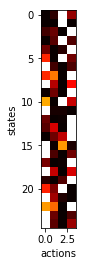

In [9]:
##change set level to easy or hard

import gym
import gridworld

env = gym.make('GridWorld-v0')
set_level = 'hard'
show_heatmap = True
n_eps, episode_length = 5000, 100
epsilon = 0.4
epsilon_decay = 0.999
lr = 0.05
gamma = 0.99

n_action = len(env.action_str)
n_states = len(env.GRIDMAP[0]) * len(env.GRIDMAP)
Q_ = np.random.rand(n_states,n_action)
#Q_ = Q_ / Q_.sum(axis=1, keepdims=True)
reward_array = np.zeros([n_eps,])

for i_eps in range(0, n_eps):
    
    eps_reward = 0
    epsilon = epsilon*epsilon_decay
    s = env.reset(set_level)
        
    for i_step in range(0, episode_length):

        srow = get_state_row(s, env.GRIDMAP)
        
        a = get_action(Q_, s, epsilon, env.action_str, env.GRIDMAP)
        acol = env.action_str.find(a)
        s_, reward, done, info = env.step(a)
        s_row = get_state_row(s_, env.GRIDMAP)
        
        Q_[srow,acol] = Q_[srow,acol] + lr*( reward + gamma*max(Q_[s_row,:]) - Q_[srow,acol] )
        
        eps_reward += reward
        s = s_

    reward_array[i_eps] = eps_reward
        
plt.plot(reward_array)
plt.xlabel('Episode number')
plt.ylabel('Episode reward')
plt.show()
        
print(Q_)
plt.imshow(remap_Q(Q_), cmap='hot', interpolation='nearest')
plt.xlabel('actions')
plt.ylabel('states')
plt.show()

In [12]:
#visualize trajectory:
episode_length = 20
reward_total = 0
sleep_time = 0.5
s = env.reset(set_level)
clear_output(wait=True)
env.render()
time.sleep(sleep_time)

for i_step in range(0, episode_length):
    
    a = get_action(Q_, s, 0.0, env.action_str, env.GRIDMAP)
    s, reward, done, info = env.step(a)
    reward_total += reward
    clear_output(wait=True)
    env.render()
    print('\nStep:',i_step, 'Reward:', reward_total)
    time.sleep(sleep_time)

-A-B-
-----
---b-
-X---
-a---

Step: 19 Reward: 39
